In [29]:
import sys
import glob
import subprocess
import pandas as pd
import numpy as np

sys.path.append("/Users/pp/Documents/Repos/QPy")
sys.path.append("/Users/pp/Documents/Repos/QPy/src/postprocessing/cal_parsing/build/")
print(sys.path)

so_paths = glob.glob('/Users/pp/Documents/Repos/QPy/src/postprocessing/cal_parsing/build/*.so')

if len(so_paths) > 0:
    print("Found libs")
else:
    command = "cmake ~/Documents/Repos/QPy/src/postprocessing/cal_parsing/CMakeLists.txt -B~/Documents/Repos/QPy/src/postprocessing/cal_parsing/build"
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    print(output)

    command = "make -C /Users/pp/Documents/Repos/QPy/src/postprocessing/cal_parsing/build"
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    print(output)


from src.postprocessing.QNC_std_output_factory import OutputFormat
from src.postprocessing.QNC_output_parser import QNC_output_parser
from src.postprocessing.QNC_ncdf_reader import QNC_ncdf_reader

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/pp/Documents/Repos/QPy', '/Users/pp/anaconda3/envs/PHS-post/lib/python312.zip', '/Users/pp/anaconda3/envs/PHS-post/lib/python3.12', '/Users/pp/anaconda3/envs/PHS-post/lib/python3.12/lib-dynload', '', '/Users/pp/anaconda3/envs/PHS-post/lib/python3.12/site-packages', '/Users/pp/Documents/Repos/QPy', '/Users/pp/Documents/Repos/QPy/src/postprocessing/cal_parsing/build/', '/Users/pp/Documents/Repos/QPy', '/Users/pp/Documents/Repos/QPy/src/postprocessing/cal_parsing/build/']
Found libs


In [ ]:
output_paths  =  {}
output_paths['std'] = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests_for_2024_workshop/extreme_std_base/'
output_paths['hyd'] = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests_for_2024_workshop/extreme_hyd_base/'

In [33]:
#exp_path = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests/online/'
output_paths  =  {}
output_paths['std'] = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests_for_2024_workshop/std_base/'
output_paths['hyd'] = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests_for_2024_workshop/hyd_base/'
output_paths['hyd_low'] = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests_for_2024_workshop/hyd_low/'
key_list =list(output_paths.keys())

In [34]:
parser = QNC_output_parser(output_paths['hyd'])
parser.read()
output = parser.Available_outputs['static']

/Users/pp/Documents/Repos/QPy/src/postprocessing/QNC_basic_Information_parser.py:53: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sinfo_data = pd.read_csv(self.root_path + self.postprocess_subdir + self.sinfo_file, delim_whitespace=True, nrows=1)
/Users/pp/Documents/Repos/QPy/src/postprocessing/QNC_basic_Information_parser.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  exp_info_data = pd.read_csv(self.root_path + self.postprocess_subdir  + self.exp_info_file, delim_whitespace=True)


In [35]:
outputs = {}
for key in output_paths.keys():
    outputs[key]  = QNC_ncdf_reader(output_paths[key],
                                        output.Categories,
                                        output.Identifier,
                                        output.Time_resolution
                                        )

    outputs[key].parse_env_and_variables()
    outputs[key].read_all_1D()
    outputs[key].close()
    

     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (13.7 sec.)
     Reading variable names and units... Done! (13.7 sec.)
     Reading all 1D variables... Done! (0.7 sec.)
     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (13.5 sec.)
     Reading variable names and units... Done! (13.5 sec.)
     Reading all 1D variables... Done! (0.6 sec.)
     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (13.5 sec.)
     Reading variable names and units... Done! (13.5 sec.)
     Reading all 1D variables... Done! (0.6 sec.)


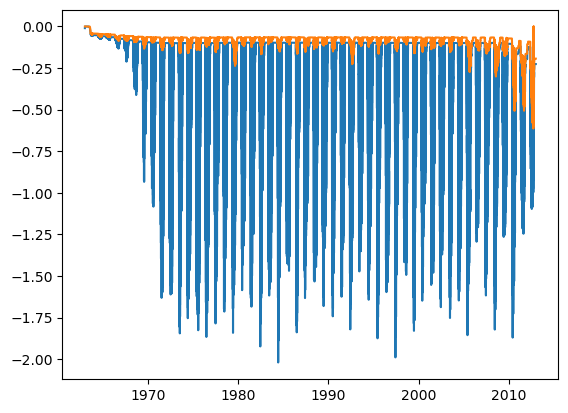

In [36]:
import matplotlib.pyplot as plt
import datetime

key = 'hyd'

plt.plot(outputs[key].times_np_64, outputs[key].Datasets_1D['PHYD']['psi_leaf_avg'])
plt.plot(outputs[key].times_np_64, outputs[key].Datasets_1D['PHYD']['psi_stem_avg'])

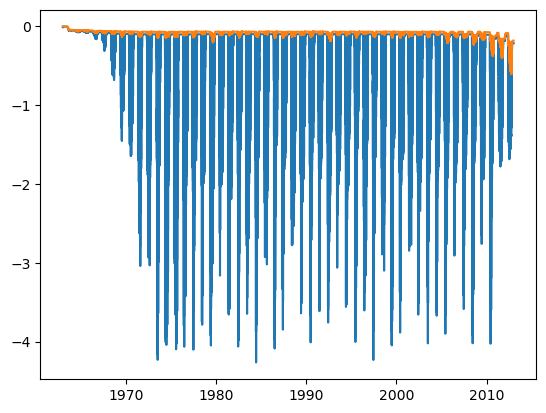

In [37]:
import matplotlib.pyplot as plt
import datetime

key = 'hyd_low'

plt.plot(outputs[key].times_np_64, outputs[key].Datasets_1D['PHYD']['psi_leaf_avg'])
plt.plot(outputs[key].times_np_64, outputs[key].Datasets_1D['PHYD']['psi_stem_avg'])
#plt.xlim((datetime.datetime(2005, 5, 10), datetime.datetime(2005, 6, 1)))

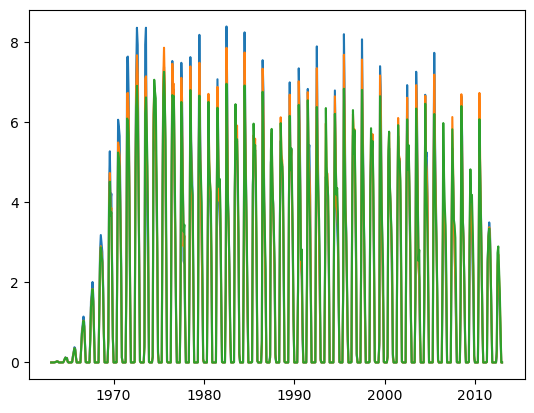

In [16]:
for key in output_paths.keys():
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df_s = outputs[key].Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='ME')).mean()
    plt.plot(df_s.index, df_s['gpp_avg'])

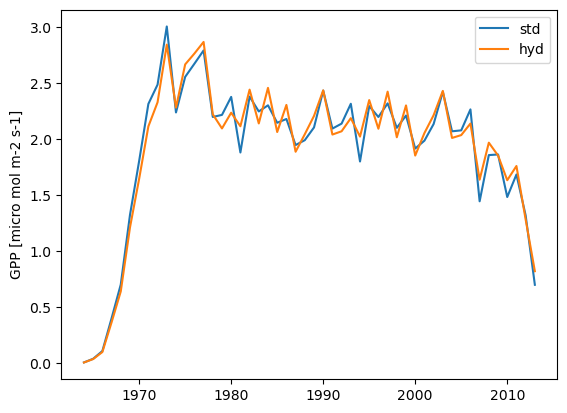

In [105]:
for key in key_list[:2]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df_s = outputs[key].Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='YE')).mean()
    plt.plot(df_s.index, df_s['gpp_avg'], label = key)
plt.ylabel(f"GPP [{outputs[key].Units_1D['Q_ASSIMI']['gpp_avg']}]")
plt.legend()
plt.savefig("GPP_hyd.png", dpi = 150)

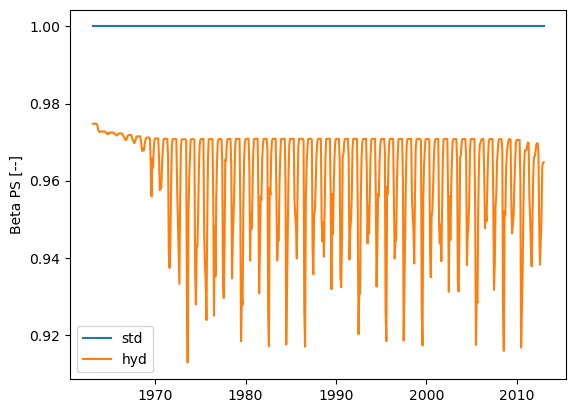

In [46]:
for key in key_list[:2]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df_s = outputs[key].Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='ME')).mean()
    plt.plot(df_s.index, df_s['beta_gs'], label=key)
plt.ylabel(f"Beta PS [{outputs[key].Units_1D['Q_ASSIMI']['beta_ps']}]")
plt.legend()

In [341]:
outputs[key].Units_1D['Q_ASSIMI']['gpp_avg']

'micro mol m-2 s-1'

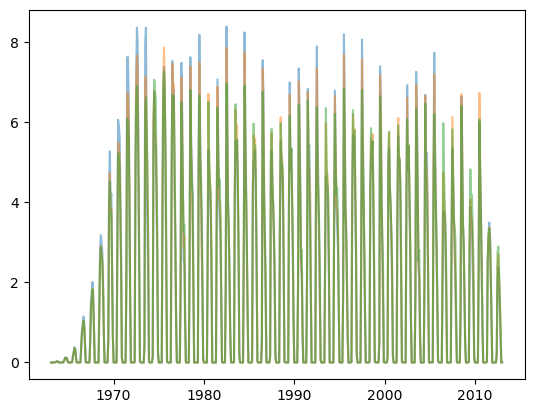

In [19]:
for key in output_paths.keys():
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df_s = outputs[key].Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='ME')).mean()
    plt.plot(df_s.index, df_s['gpp_avg'], alpha = 0.5)

In [20]:
key =  key_list[0]
outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
d1 = outputs[key].Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='ME')).mean()
key =  key_list[1]
outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
d2 = outputs[key].Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='ME')).mean()

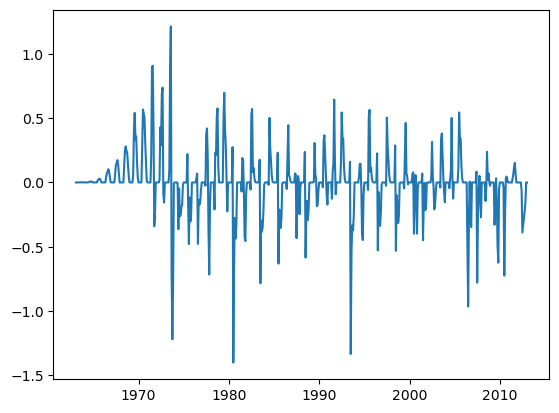

In [21]:
plt.plot(df_s.index, d1['gpp_avg'] - d2['gpp_avg'])

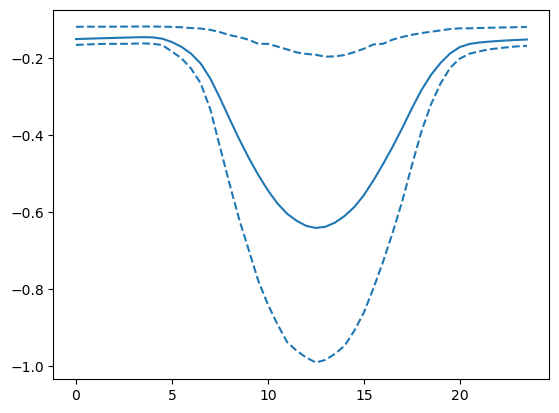

In [53]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df = df[df['psi_leaf_avg'] < -0.1]
df_m = df.groupby(['hour', 'min']).mean()
df_l= df.groupby(['hour', 'min']).quantile(0.25)
df_u= df.groupby(['hour', 'min']).quantile(0.75)
plt.plot(np.arange(0,24, 0.5),df_m['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_l['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue', ls = '--')
plt.plot(np.arange(0,24, 0.5),df_u['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue', ls = '--')

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
/var/folders/9r/97b9zk_j4ys8v5lnksc4l4j00000gq/T/ipykernel_16893/2217319746.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(np.arange(0,24, 0.5),df_m['psi_leaf_avg'], alpha = 1.0, c = 'tab:green', label = '$\psi_\mathrm{Leaf}$')
/var/folders/9r/97b9zk_j4ys8v5lnksc4l4j00000gq/T/ipykernel_16893/2217319746.py:13: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(np.arange(0,24, 0.5),df_m['psi_stem_avg'], alpha = 1.0, c = 'tab:brown',  label = '$\psi_\mathrm{Stem}$')


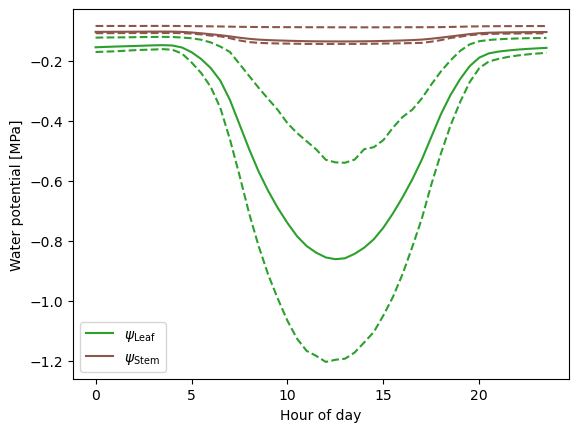

In [116]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df = df[df['month'] < 9]
df = df[df['month'] > 4]
df_m = df.groupby(['hour', 'min']).mean()
df_l= df.groupby(['hour', 'min']).quantile(0.25)
df_u= df.groupby(['hour', 'min']).quantile(0.75)
plt.plot(np.arange(0,24, 0.5),df_m['psi_leaf_avg'], alpha = 1.0, c = 'tab:green', label = '$\psi_\mathrm{Leaf}$')
plt.plot(np.arange(0,24, 0.5),df_l['psi_leaf_avg'], alpha = 1.0, c = 'tab:green', ls = '--')
plt.plot(np.arange(0,24, 0.5),df_u['psi_leaf_avg'], alpha = 1.0, c = 'tab:green', ls = '--')
plt.plot(np.arange(0,24, 0.5),df_m['psi_stem_avg'], alpha = 1.0, c = 'tab:brown',  label = '$\psi_\mathrm{Stem}$')
plt.plot(np.arange(0,24, 0.5),df_l['psi_stem_avg'], alpha = 1.0, c = 'tab:brown', ls = '--')
plt.plot(np.arange(0,24, 0.5),df_u['psi_stem_avg'], alpha = 1.0, c = 'tab:brown', ls = '--')
plt.legend()
plt.ylabel(f"Water potential [MPa]")
plt.xlabel("Hour of day")
plt.savefig("Leaf water potential.png")

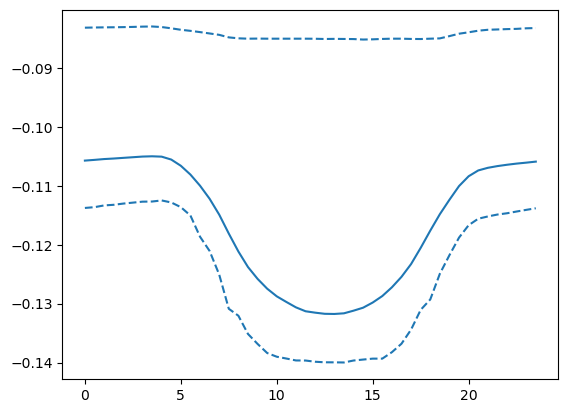

In [119]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df = df[df['psi_leaf_avg'] < -0.1]
df_m = df.groupby(['hour', 'min']).mean()
df_l= df.groupby(['hour', 'min']).quantile(0.25)
df_u= df.groupby(['hour', 'min']).quantile(0.75)
plt.plot(np.arange(0,24, 0.5),df_m['psi_stem_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_l['psi_stem_avg'], alpha = 1.0, c = 'tab:blue', ls = '--')
plt.plot(np.arange(0,24, 0.5),df_u['psi_stem_avg'], alpha = 1.0, c = 'tab:blue', ls = '--')

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/var/folders/9r/97b9zk_j4ys8v5lnksc4l4j00000gq/T/ipykernel_16893/1486524623.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(df_s.index, df_s['psi_leaf_avg'], alpha = 1, label = '$\psi_\mathrm{Leaf}$', c='tab:green')
/var/folders/9r/97b9zk_j4ys8v5lnksc4l4j00000gq/T/ipykernel_16893/1486524623.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(df_s.index, df_s['psi_stem_avg'], alpha = 1, label = '$\psi_\mathrm{Stem}$', c='tab:brown')


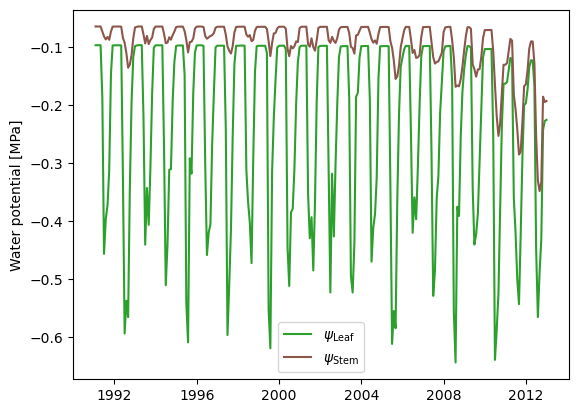

In [121]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df = df[df['psi_leaf_avg'] < -0.01]
df_s = df.groupby(pd.Grouper(key='date', freq='1ME')).mean()
df_s = df.groupby(pd.Grouper(key='date', freq='1ME')).mean()

plt.plot(df_s.index, df_s['psi_leaf_avg'], alpha = 1, label = '$\psi_\mathrm{Leaf}$', c='tab:green')
plt.plot(df_s.index, df_s['psi_stem_avg'], alpha = 1, label = '$\psi_\mathrm{Stem}$', c='tab:brown')
plt.legend()
plt.ylabel(f"Water potential [MPa]")
plt.savefig("Water_potential.png", dpi=150)


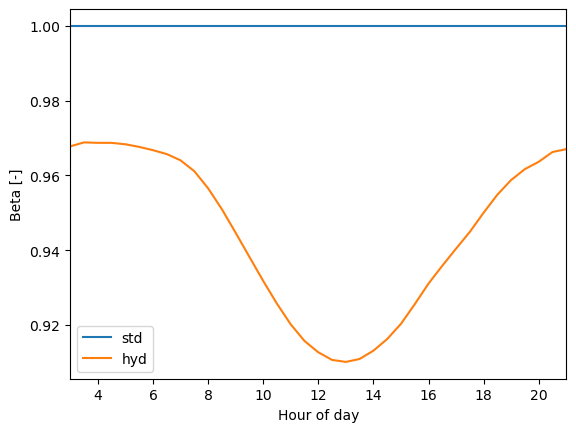

In [123]:
for key in key_list[0:2]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    df = df[df['gpp_avg'] > 0.0001]
    df_s = df.groupby(['hour', 'min']).mean()
    plt.plot(np.arange(0.5,24, 0.5),df_s['beta_ps'], alpha = 1.0, label = key)    

plt.ylabel(f"Beta [-]")
plt.xlabel(f"Hour of day")
plt.xlim((3,21))
plt.legend()
plt.savefig("Beta.png", dpi=150)

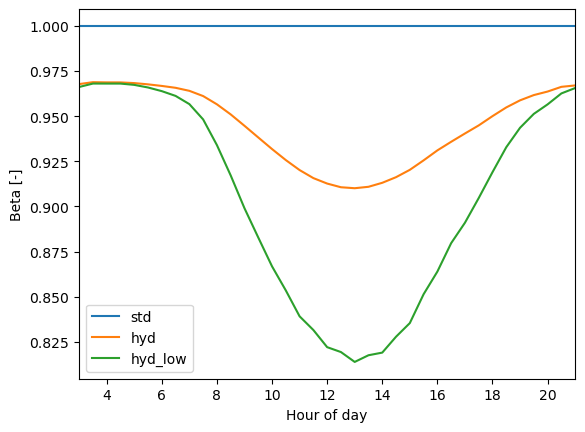

In [87]:
for key in key_list[0:3]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    df = df[df['gpp_avg'] > 0.0001]
    df_s = df.groupby(['hour', 'min']).mean()
    plt.plot(np.arange(0.5,24, 0.5),df_s['beta_ps'], alpha = 1.0, label = key)    

plt.ylabel(f"Beta [-]")
plt.xlabel(f"Hour of day")
plt.xlim((3,21))
plt.legend()

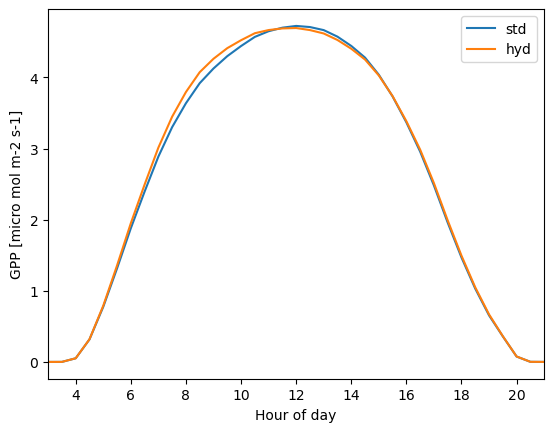

In [127]:
for key in key_list[0:2]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    df_s = df.groupby(['hour', 'min']).mean()
    plt.plot(np.arange(0,24, 0.5),df_s['gpp_avg'], alpha = 1.0, label = key)    

plt.ylabel(f"GPP [{outputs[key].Units_1D['Q_ASSIMI']['gpp_avg']}]")
plt.xlabel(f"Hour of day")
plt.xlim((3,21))
plt.legend()
plt.savefig("GPP_day.png", dpi = 150)

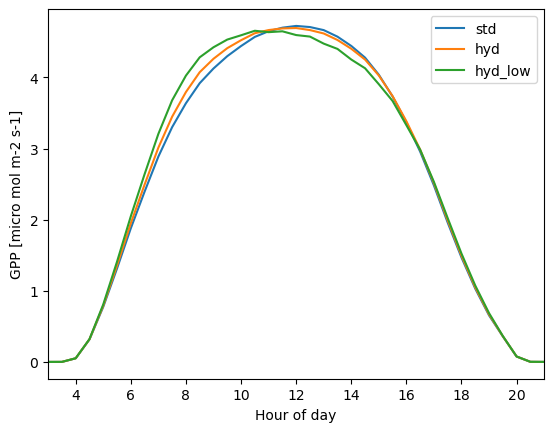

In [126]:
for key in key_list[0:3]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    df_s = df.groupby(['hour', 'min']).mean()
    plt.plot(np.arange(0,24, 0.5),df_s['gpp_avg'], alpha = 1.0, label = key)    

plt.ylabel(f"GPP [{outputs[key].Units_1D['Q_ASSIMI']['gpp_avg']}]")
plt.xlabel(f"Hour of day")
plt.savefig("GPP_day_low.png", dpi = 150)
plt.xlim((3,21))
plt.legend()
plt.savefig("GPP_day_low.png", dpi = 150)

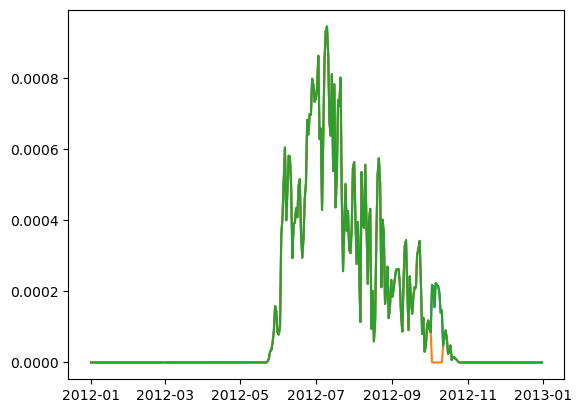

In [23]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 2011]
df_s = df.groupby(pd.Grouper(key='date', freq='d')).mean()
plt.plot(df_s.index, df_s['stem_flow_avg'], alpha = 1)
plt.plot(df_s.index, df_s['G_avg'], alpha = 1)
outputs[key].Datasets_1D['SPQ']['date'] = pd.to_datetime(outputs[key].Datasets_1D['SPQ']['date'])
df = outputs[key].Datasets_1D['SPQ']
df = df[df['year'] > 2011]
df_s = df.groupby(pd.Grouper(key='date', freq='d')).mean()
plt.plot(df_s.index, df_s['transpiration_avg'] * 1000/18.0 , alpha = 1)



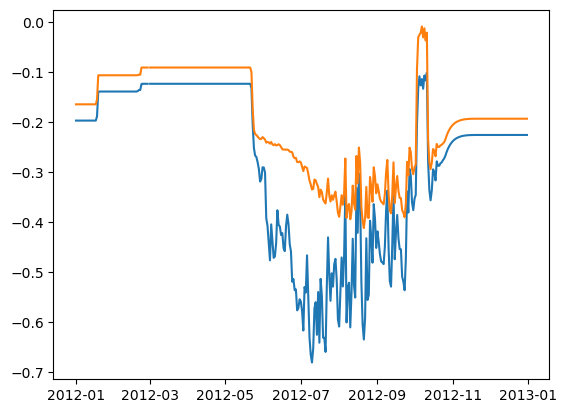

In [398]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 2011]
df_s = df.groupby(pd.Grouper(key='date', freq='1ME')).mean()
df_s = df.groupby(pd.Grouper(key='date', freq='1d')).mean()

plt.plot(df_s.index, df_s['psi_leaf_avg'], alpha = 1)
plt.plot(df_s.index, df_s['psi_stem_avg'], alpha = 1)

In [380]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
#plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))

KeyError: 'stem_water_flow'

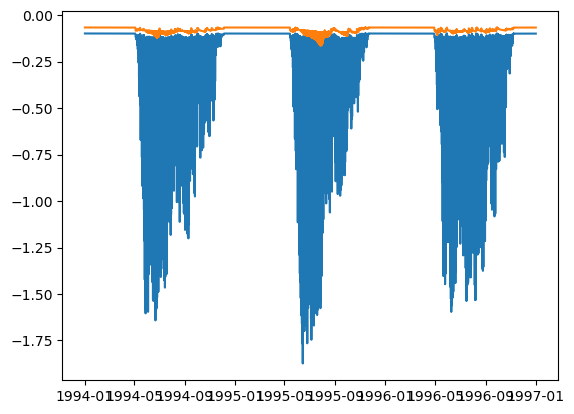

In [348]:
import matplotlib.pyplot as plt
import datetime

key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1993]
df = df[df['year'] < 1997]
plt.plot(df['date'],df['psi_leaf_avg'])
plt.plot(df['date'],df['psi_stem_avg'])

(8895.0, 8921.0)

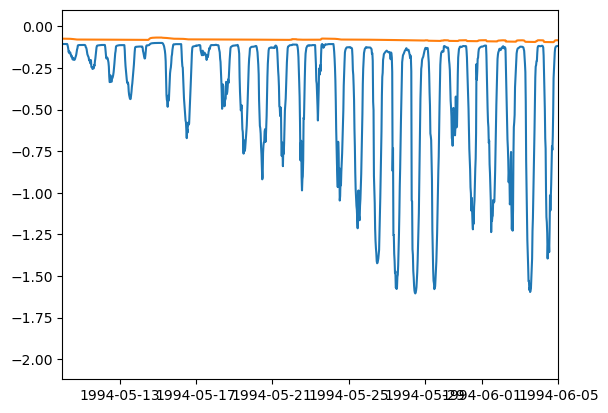

In [373]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
#df = df[df['year'] > 1999]
plt.plot(df['date'],df['psi_leaf_avg'])
plt.plot(df['date'],df['psi_stem_avg'])
plt.xlim((datetime.datetime(1994, 5, 10), datetime.datetime(1994, 6, 5)))

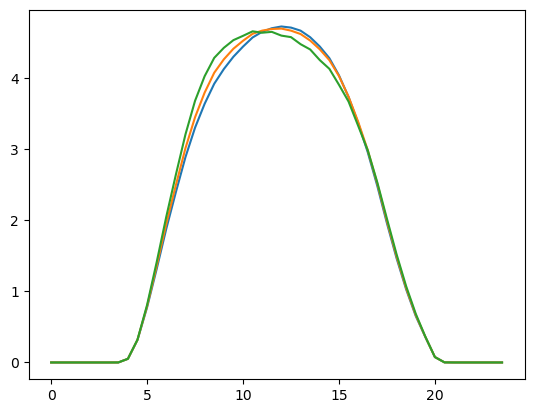

In [25]:
for key in:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    df_s = df.groupby(['hour', 'min']).mean()
    plt.plot(np.arange(0,24, 0.5),df_s['gpp_avg'], alpha = 1.0)

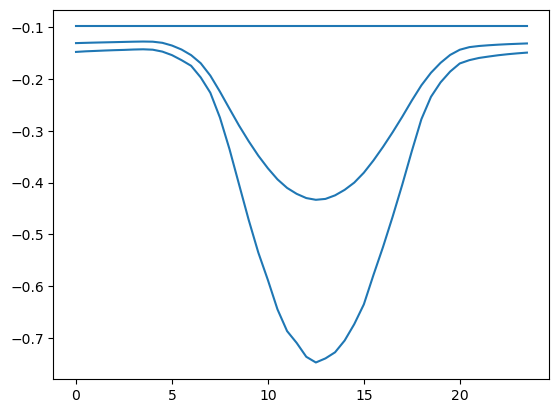

In [26]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df_m = df.groupby(['hour', 'min']).mean()
df_l= df.groupby(['hour', 'min']).quantile(0.25)
df_u= df.groupby(['hour', 'min']).quantile(0.75)
plt.plot(np.arange(0,24, 0.5),df_m['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_l['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_u['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')

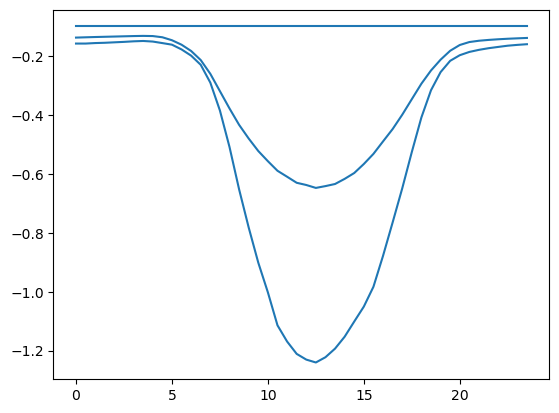

In [27]:
key = key_list[2]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df_m = df.groupby(['hour', 'min']).mean()
df_l= df.groupby(['hour', 'min']).quantile(0.25)
df_u= df.groupby(['hour', 'min']).quantile(0.75)
plt.plot(np.arange(0,24, 0.5),df_m['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_l['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_u['psi_leaf_avg'], alpha = 1.0, c = 'tab:blue')

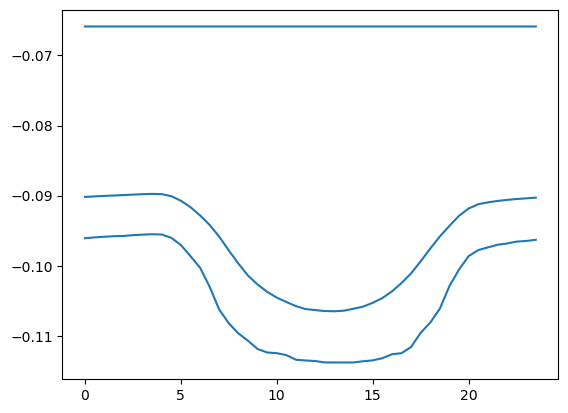

In [371]:
key = key_list[1]
outputs[key].Datasets_1D['PHYD']['date'] = pd.to_datetime(outputs[key].Datasets_1D['PHYD']['date'])
df = outputs[key].Datasets_1D['PHYD']
df = df[df['year'] > 1990]
df_m = df.groupby(['hour', 'min']).mean()
df_l= df.groupby(['hour', 'min']).quantile(0.25)
df_u= df.groupby(['hour', 'min']).quantile(0.75)
plt.plot(np.arange(0,24, 0.5),df_m['psi_stem_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_l['psi_stem_avg'], alpha = 1.0, c = 'tab:blue')
plt.plot(np.arange(0,24, 0.5),df_u['psi_stem_avg'], alpha = 1.0, c = 'tab:blue')

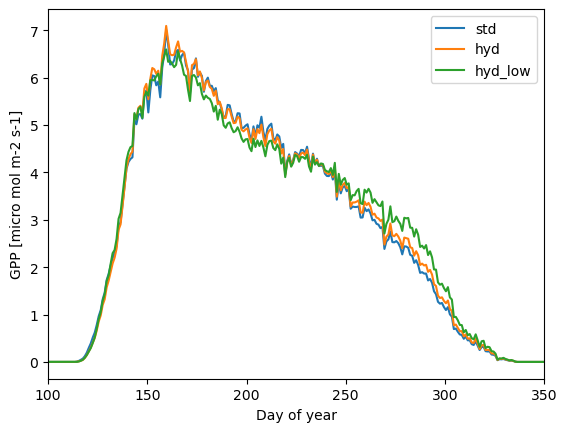

In [128]:
for key in key_list[0:3]:
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    #df.set_index('date', inplace=True)
    df_s = df.groupby(pd.Grouper(key='date', freq='d')).mean()    
    df_ss  = df_s.groupby(['day_of_year']).mean()
    
    plt.plot(df_ss['gpp_avg'], alpha = 1.0, label = key)
plt.legend()
plt.ylabel(f"GPP [{outputs[key].Units_1D['Q_ASSIMI']['gpp_avg']}]")
plt.xlabel("Day of year")
plt.xlim((100, 350))
plt.savefig("GPP_day_of_year_low.png", dpi = 150)

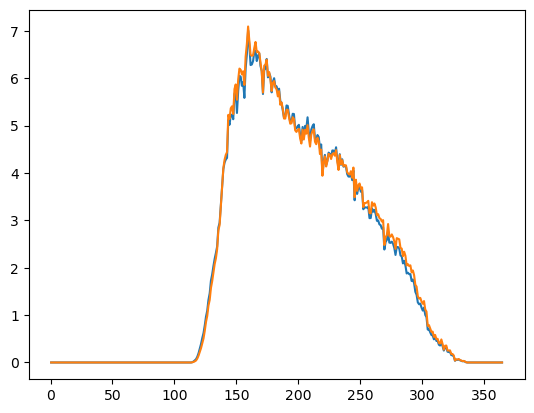

In [372]:
for key in output_paths.keys():
    outputs[key].Datasets_1D['Q_ASSIMI']['date'] = pd.to_datetime(outputs[key].Datasets_1D['Q_ASSIMI']['date'])
    df = outputs[key].Datasets_1D['Q_ASSIMI']
    df = df[df['year'] > 1980]
    #df.set_index('date', inplace=True)
    df_s = df.groupby(pd.Grouper(key='date', freq='d')).mean()    
    df_ss  = df_s.groupby(['day_of_year']).mean()
    plt.plot(df_ss['gpp_avg'], alpha = 1.0)

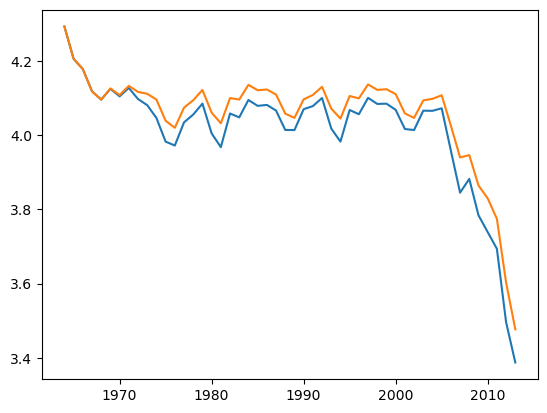

In [269]:
for key in output_paths.keys():
    outputs[key].Datasets_1D['SPQ']['date'] = pd.to_datetime(outputs[key].Datasets_1D['SPQ']['date'])
    df_s = outputs[key].Datasets_1D['SPQ'].groupby(pd.Grouper(key='date', freq='YE')).mean()
    plt.plot(df_s.index, df_s['water_content_soil'])

In [192]:
outputs[key].Datasets_1D['SPQ']

,index,year,month,day,hour,min,sec,day_of_year,date,time,water_content_soil,pet_avg,evaporation_avg,interception_avg,transpiration_avg,srf_runoff_avg,drainage_avg,qh_avg,qle_avg,qg_avg
0,0,1963,1,1,0,0,0,0.000000,1963-01-01 00:00:00,1.800000e+03,4.351319,-2.986892e-06,2.986892e-06,0.0,0.0,0.000003,0.0,-4.143585,-7.469618,2.631706
1,1,1963,1,1,0,30,0,0.020833,1963-01-01 00:30:00,3.600000e+03,4.351308,-2.866679e-06,1.908722e-06,0.0,0.0,0.000003,0.0,-6.207664,-4.773332,2.266729
2,2,1963,1,1,1,0,0,0.041667,1963-01-01 01:00:00,5.400000e+03,4.351299,-2.708340e-06,5.881397e-07,0.0,0.0,0.000004,0.0,-6.033585,-1.470820,2.008016
3,3,1963,1,1,1,30,0,0.062500,1963-01-01 01:30:00,7.200000e+03,4.351291,-2.737781e-06,-2.051189e-07,0.0,0.0,0.000004,0.0,-4.949764,0.512961,1.693921
4,4,1963,1,1,2,0,0,0.083333,1963-01-01 02:00:00,9.000000e+03,4.351283,-2.436244e-06,0.000000e+00,0.0,0.0,0.000004,0.0,-4.173461,0.000000,1.699597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875995,875995,2012,12,31,21,30,0,364.895833,2012-12-31 21:30:00,1.576793e+09,3.295579,2.390180e-07,-2.390180e-07,0.0,0.0,0.000000,0.0,10.842034,0.597736,-7.570561
875996,875996,2012,12,31,22,0,0,364.916667,2012-12-31 22:00:00,1.576795e+09,3.295538,-1.518473e-06,0.000000e+00,0.0,0.0,0.000000,0.0,4.519940,0.000000,-6.802644
875997,875997,2012,12,31,22,30,0,364.937500,2012-12-31 22:30:00,1.576796e+09,3.295497,-1.809490e-06,0.000000e+00,0.0,0.0,0.000000,0.0,3.449390,0.000000,-5.995924
875998,875998,2012,12,31,23,0,0,364.958333,2012-12-31 23:00:00,1.576798e+09,3.295456,-2.009877e-06,0.000000e+00,0.0,0.0,0.000000,0.0,2.876908,0.000000,-5.238681


In [193]:
outputs[key].Datasets_1D['SPQ']['water_content_soil']

0         4.351319
1         4.351308
2         4.351299
3         4.351291
4         4.351283
            ...   
875995    3.295579
875996    3.295538
875997    3.295497
875998    3.295456
875999    3.295415
Name: water_content_soil, Length: 876000, dtype: float32

In [156]:
outputs[key].Datasets_1D['Q_ASSIMI']['date']

KeyError: 'date'

In [154]:
df

,index,year,month,day,hour,min,sec,day_of_year,time,gpp_avg,gc_avg,beta_gs,beta_ps
date,,,,,,,,,,,,,
1963-01-01 00:00:00,0,1963,1,1,0,0,0,0.000000,1.800000e+03,0.0,0.0,1.000000,1.000000
1963-01-01 00:30:00,1,1963,1,1,0,30,0,0.020833,3.600000e+03,0.0,0.0,0.974382,0.974382
1963-01-01 01:00:00,2,1963,1,1,1,0,0,0.041667,5.400000e+03,0.0,0.0,0.974759,0.974759
1963-01-01 01:30:00,3,1963,1,1,1,30,0,0.062500,7.200000e+03,0.0,0.0,0.974759,0.974759
1963-01-01 02:00:00,4,1963,1,1,2,0,0,0.083333,9.000000e+03,0.0,0.0,0.974759,0.974759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 21:30:00,875995,2012,12,31,21,30,0,364.895833,1.576793e+09,0.0,0.0,0.964764,0.964764
2012-12-31 22:00:00,875996,2012,12,31,22,0,0,364.916667,1.576795e+09,0.0,0.0,0.964764,0.964764
2012-12-31 22:30:00,875997,2012,12,31,22,30,0,364.937500,1.576796e+09,0.0,0.0,0.964764,0.964764
